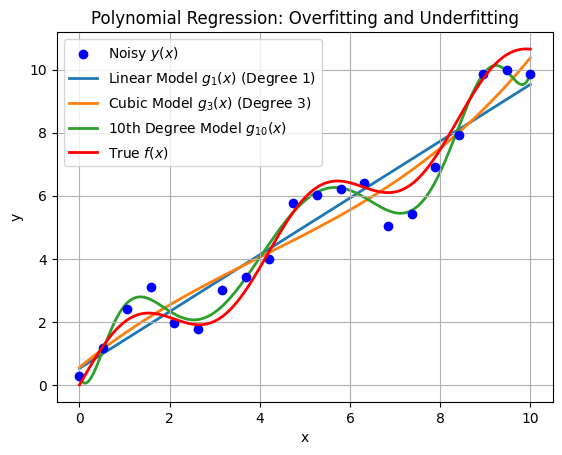

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate the dataset
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 points between 0 and 10
x = np.sort(x)  # Ensure x values are sorted
f_x = x + np.sin(1.5 * x)
noise = np.random.normal(0, np.sqrt(0.3), size=x.shape)  # Noise term
y = f_x + noise  # Noisy observations

# Create scatter plot of the noisy data points
plt.scatter(x, y, color='blue', label='Noisy $y(x)$', zorder=2)

# Define a function to fit and plot polynomial models
def plot_polynomial_model(degree, x, y, label):
    # Create polynomial features and fit linear regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)  # Fit the model

    # Predict values for smooth plotting
    x_smooth = np.linspace(0, 10, 1000)  # 1000 points for smooth curve
    y_smooth = model.predict(x_smooth[:, np.newaxis])

    # Plot the polynomial fit
    plt.plot(x_smooth, y_smooth, label=label, linewidth=2, zorder=1)

# Step 4: Plot the three polynomial models
plot_polynomial_model(1, x, y, 'Linear Model $g_1(x)$ (Degree 1)')  # Linear Model
plot_polynomial_model(3, x, y, 'Cubic Model $g_3(x)$ (Degree 3)')   # Cubic Model
plot_polynomial_model(10, x, y, '10th Degree Model $g_{10}(x)$')    # 10th Degree Model

# Step 5: Plot the true function f(x)
x_smooth = np.linspace(0, 10, 1000)
f_x_smooth = x_smooth + np.sin(1.5 * x_smooth)
plt.plot(x_smooth, f_x_smooth, color='red', label='True $f(x)$', linewidth=2, zorder=3)

# Step 6: Finalize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression: Overfitting and Underfitting')
plt.legend()
plt.grid(True)
plt.show()
